<div style="display: inline-block;">
    <img src="images/nhsa_logo.png" alt="Image" style="text-align: left;">
</div>

# Parent Gauge Data Analysis Project
---
## Data Cleaning Analysis

Welcome to the Data Cleaning Analysis Report! This report aims to provide a clear understanding of the data cleaning process without delving into complex technical details. Our primary goal is to identify and highlight areas in the dataset that require cleaning, without performing any data manipulation.

Throughout this report, we will examine the dataset and identify potential issues or inconsistencies that may impact the reliability and accuracy of the data. By thoroughly assessing the data quality, we can ensure that our analyses and subsequent decision-making processes are based on a solid foundation.

By the end of this report, you will have a comprehensive overview of the data cleaning requirements, enabling you to make informed decisions about the necessary steps to enhance the overall quality of our dataset.

Let's dive in and explore what areas require attention in the data cleaning process.

In [5]:
# Start with the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [3]:
#Load the Data into the dataframe
df = pd.read_excel('INTVDATA.xlsx', sheet_name ='Main', engine ='openpyxl')

#Copy existing dataframe to .csv file
df.to_csv("intv_data.csv", index=False)

#read the new .csv file
df = pd.read_csv('intv_data.csv')

/var/folders/vw/1sthm_ts1dj_1hqg1xnsz19w0000gn/T/ipykernel_89555/2594145135.py:8: DtypeWarning: Columns (16,18,27,35,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('intv_data.csv')


## DESCRIPTIVE ANALYSIS

Before we dive into the data cleaning process, it is essential to conduct a descriptive analysis to gain a comprehensive understanding of the dataset we are working with. Descriptive analysis involves summarizing and exploring the key characteristics, distributions, and patterns present in the data.

Through this analysis, we aim to answer questions such as:

- What are the variables included in the dataset?
- What are the data types of each variable?
- What is the overall size and structure of the dataset?
- What are the summary statistics for numerical variables?
- What are the frequency distributions for categorical variables?
- By examining these aspects, we can establish a baseline understanding of the dataset, which will serve as a reference point for identifying and addressing data quality issues during the cleaning process.

Let's proceed with the descriptive analysis to gain insights into the dataset's composition and characteristics, enabling us to make informed decisions regarding the data cleaning and preparation steps.

In [6]:
#describe
df.describe()

,Unnamed: 0.1,Unnamed: 0
count,204879.000000,204675.000000
mean,102439.000000,498.938033
std,59143.617238,288.536104
min,0.000000,0.000000
25%,51219.500000,249.000000
50%,102439.000000,499.000000
75%,153658.500000,749.000000
max,204878.000000,999.000000


## MISSING VALUE ANALYSIS

In this section, we focus on analyzing missing values within our dataset. Missing values refer to any instance where data is not recorded or unavailable for specific variables. Identifying and addressing missing values is crucial as they can introduce bias and affect the integrity of our analyses.

Through careful examination, we will investigate the extent and patterns of missing values in our dataset. This analysis will help us understand the potential impact of missing data on our results and allow us to devise appropriate strategies for handling them.

By addressing missing values effectively, we aim to enhance the reliability and completeness of our dataset, enabling us to draw more accurate conclusions and make informed decisions based on the data.

Let's proceed with our missing value analysis to uncover valuable insights and formulate a plan for handling missing data appropriately.

In [7]:
# Counting total number of rows
row_count = df.shape[0]
print("Total number of rows:", row_count)
print("\n")

##MISSING VALUE ANALYSIS
print("*****MISSING VALUE ANALYSIS*****")
missing_count = df.isnull().sum()
total_count = df.shape[0]
missing_percentage = (missing_count / total_count) * 100

missing_data_table = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(2)})
print(missing_data_table)

Total number of rows: 204879


*****MISSING VALUE ANALYSIS*****
                              Missing Count  Missing Percentage
Unnamed: 0.1                              0                0.00
Unnamed: 0                              204                0.10
center                                    0                0.00
created_at                                0                0.00
date                                      0                0.00
evaluation                                0                0.00
evaluation_year                           0                0.00
guardian                                  0                0.00
guardian_employment                  133062               64.95
guardian_enrollment_date             143292               69.94
guardian_highest_education           135274               66.03
guardian_hispanic                     24364               11.89
guardian_native_language              14930                7.29
guardian_race                         16

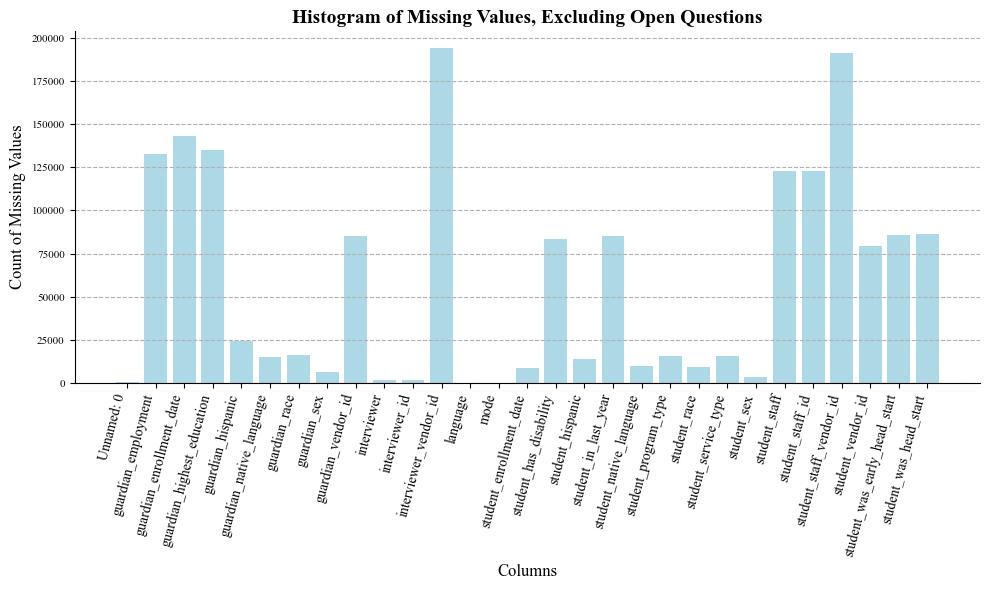

In [8]:
# Assuming 'df' is your DataFrame
missing_count = df.isnull().sum()
# Filter variables with missing values above zero and that are not open interview questions
missing_count = missing_count[(missing_count > 0) & (~missing_count.index.str.startswith('OQ'))] 

# Plotting the histogram
# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram
ax.bar(missing_count.index, missing_count.values, color='lightblue')

# Customize the appearance
ax.set_xlabel('Columns', fontsize=12, fontfamily='Times New Roman')
ax.set_ylabel('Count of Missing Values', fontsize=12, fontfamily='Times New Roman')
ax.set_title('Histogram of Missing Values, Excluding Open Questions', fontsize=14, fontweight='bold', fontfamily='Times New Roman')

# Adjusting x-axis labels rotation and font size
plt.xticks(rotation=75, ha='right', fontsize=10, fontfamily='Times New Roman')

# Adjusting y-axis tick label font size
plt.yticks(fontsize=8, fontfamily='Times New Roman')

# Add grid lines
ax.grid(axis='y', linestyle='--')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tweak the layout
fig.tight_layout()

# Show the plot
plt.show()

## DUPLICATE VALUE ANALYSIS

In this section, we shift our focus to analyzing duplicate values within our dataset. Duplicate values refer to instances where identical or highly similar rows or columns are present in the dataset. Identifying and addressing duplicate values is essential as they can distort our analyses and lead to misleading conclusions.

Our analysis will primarily focus on identifying duplicate rows and columns. Duplicate rows occur when multiple entries in the dataset share the same values across all or most of their attributes. Duplicate columns, on the other hand, refer to identical or highly similar column headers that contain redundant information.

By conducting a thorough examination, we aim to quantify the presence of duplicate values in our dataset. This analysis will help us understand the extent of the issue and provide insights into potential sources of duplication. Additionally, it will enable us to develop strategies to mitigate the impact of duplicate values and ensure the accuracy and integrity of our analyses.

Through this analysis, we have identified a total of 203 duplicate rows, which correspond to duplicate column headers. These duplicate rows can potentially introduce inconsistencies in our dataset and affect the reliability of our results. Therefore, addressing these duplicates is crucial to ensure the accuracy and validity of our analysis.

Let's proceed with our analysis and explore the strategies we can employ to handle these duplicate values effectively.

In [9]:
##output the number of duplicate rows
subset_columns = df.columns[2:]  # Exclude the first two columns from analysis
duplicate_count = df.duplicated(subset=subset_columns).sum()
print("Number of duplicate rows (excluding first two columns):", duplicate_count)

duplicate_rows = df[df.duplicated(subset=subset_columns)]
sample_duplicate_rows = duplicate_rows.sample(n=5)

print("Sample of 5 duplicate rows:")
print(sample_duplicate_rows)

Number of duplicate rows (excluding first two columns): 203
Sample of 5 duplicate rows:
        Unnamed: 0.1  Unnamed: 0  center  created_at  date  evaluation  \
26023          26023         NaN  center  created_at  date  evaluation   
136118        136118         NaN  center  created_at  date  evaluation   
49045          49045         NaN  center  created_at  date  evaluation   
21019          21019         NaN  center  created_at  date  evaluation   
15013          15013         NaN  center  created_at  date  evaluation   

        evaluation_year  guardian  guardian_employment  \
26023   evaluation_year  guardian  guardian_employment   
136118  evaluation_year  guardian  guardian_employment   
49045   evaluation_year  guardian  guardian_employment   
21019   evaluation_year  guardian  guardian_employment   
15013   evaluation_year  guardian  guardian_employment   

        guardian_enrollment_date  guardian_highest_education  \
26023   guardian_enrollment_date  guardian_highest_edu

## OUTLIER ANALYSIS

In this section, we delve into the analysis of outliers within our dataset. Outliers are data points that significantly deviate from the majority of the observations in a variable. Identifying and understanding outliers is essential as they can have a substantial impact on statistical analyses and modeling results.

Our analysis aims to detect and examine potential outliers in the dataset. By doing so, we can assess the extent of their presence and evaluate their influence on our analysis and decision-making processes. Understanding the nature and characteristics of outliers will allow us to make informed decisions on how to handle them appropriately.

Through this outlier analysis, we can gain valuable insights into the distribution and behavior of our data. We can identify potential errors or anomalies that may need further investigation and determine whether they should be treated as genuine outliers or if there are any data quality issues to be addressed.

Doingg this will ensure the reliability and accuracy of our analyses and prevent skewed or misleading results. Let's proceed with our outlier analysis to gain a deeper understanding of our dataset and determine the best approach to handle outliers in our analysis.